## 1.- Importar las librerias

In [1]:
!pip install graphviz
!pip install sklearn2pmml

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree.export import export_text
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn2pmml import sklearn2pmml
import graphviz

## 2.- Carga de la base de datos

In [2]:
carsCSV = pd.read_csv("cars.csv")
carsCSV.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## 3.- Información y descripción de los datos

In [3]:
carsCSV.info()
carsCSV.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,3,more,big,low,unacc
freq,432,432,432,576,576,576,1210


## 4.- Limpieza de datos

### 4.1.- Codificación y mapeo de datos

In [4]:
cars_feature_names = ["buying", "maint", "doors", "persons", "lug_boot","safety"]
cod = {"low":0, "med":1, "high":2, "vhigh":3} #para buying y maint
safety_cod = {"low":0, "med":1, "high":2} #para safety
lug_boot_cod = {"small":0, "med":1, "big":2} #para lug_boot
class_cod = {"unacc":0, "acc":1, "good":2, "vgood":3} #para class
doors_cod = {"1":1, "2":2, "3":3, "4":4, "5more":5} #para doors
persons_cod = {"1":1, "2":2, "3":3, "4":4, "more":5} #para persons

carsCSV["buying"] = carsCSV["buying"].map(cod)
carsCSV["maint"] = carsCSV["maint"].map(cod)
carsCSV["safety"] = carsCSV["safety"].map(safety_cod)
carsCSV["lug_boot"] = carsCSV["lug_boot"].map(lug_boot_cod)
carsCSV["class"] = carsCSV["class"].map(class_cod)
carsCSV["doors"] = carsCSV["doors"].map(doors_cod)
carsCSV["persons"] = carsCSV["persons"].map(persons_cod)
carsCSV.info()
carsCSV.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


### 4.2.- Limpieza de datos

In [5]:
carsCSV.dropna()
carsCSV.info()
carsCSV.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


## 5.- Árboles de decisión

### 5.1 Separación de datos

In [6]:
X_values = carsCSV.iloc[:,1:]
Y_values = carsCSV["class"]
x_train, x_test, y_train, y_test= train_test_split(X_values, Y_values, test_size=0.2, random_state=0)
x_train.head()

,maint,doors,persons,lug_boot,safety,class
1649,0,3,2,0,2,0
1465,2,4,2,2,1,0
361,0,3,4,0,1,0
315,1,5,5,0,0,0
1372,3,4,5,1,1,1


In [7]:
y_train.head()

1649    0
1465    0
361     0
315     0
1372    1
Name: class, dtype: int64

### 5.2.- Construcción del árbol utilizando un conjunto de entrenamiento

In [8]:
modelo = tree.DecisionTreeClassifier()
modelo = modelo.fit(x_train, y_train)

### 5.3.- Visualización del árbol

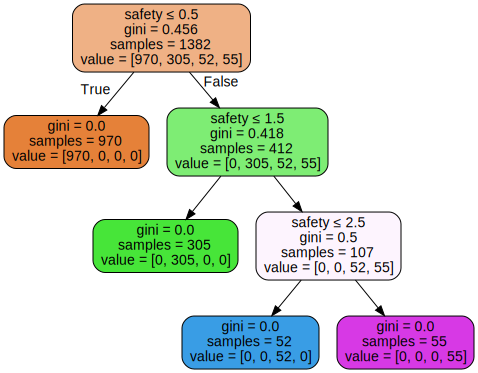

In [9]:
export_graphviz(modelo, out_file="cars_tree.dot", filled=True, rounded=True, special_characters=True,
               feature_names = cars_feature_names)

with open("cars_tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### 5.4.- Reglas de asociación

In [10]:
print(export_text(modelo, feature_names=cars_feature_names, show_weights=True))

|--- safety <= 0.50
|   |--- weights: [970.00, 0.00, 0.00, 0.00] class: 0
|--- safety >  0.50
|   |--- safety <= 1.50
|   |   |--- weights: [0.00, 305.00, 0.00, 0.00] class: 1
|   |--- safety >  1.50
|   |   |--- safety <= 2.50
|   |   |   |--- weights: [0.00, 0.00, 52.00, 0.00] class: 2
|   |   |--- safety >  2.50
|   |   |   |--- weights: [0.00, 0.00, 0.00, 55.00] class: 3



### 5.5.- Reglas de asociación SQL

In [11]:
def get_SQL(tree, feature_names):
     left      = tree.tree_.children_left
     right     = tree.tree_.children_right
     threshold = tree.tree_.threshold
     features  = [feature_names[i] for i in tree.tree_.feature]
     le = " <= "
     g = " > "
     # get ids of child nodes
     idx = np.argwhere(left == -1)[:,0]

     def recurse(left, right, child, lineage=None):
          if(lineage is None):
               lineage = [child]
          if(child in left):
               parent = np.where(left == child)[0].item()
               split = "l"
          else:
               parent = np.where(right == child)[0].item()
               split = "r"
          lineage.append((parent, split, threshold[parent], features[parent]))
          if(parent == 0):
               lineage.reverse()
               return lineage
          else:
               return recurse(left, right, parent, lineage)
     print("CASE")
     for j,child in enumerate(idx):
        clause = "    WHEN "
        for node in recurse(left, right, child):
            if(len(str(node)) < 3):
                continue
            i = node
            if(i[1] == "l"):  
                sign = le 
            else: 
                sign = g
            clause = clause + i[3] + sign + str(i[2]) + " AND "
        clause = clause[:-4] + 'THEN ' + str(j)
        print(clause)
     print("ELSE NULL END AS asociation_rules")

get_SQL(modelo, cars_feature_names)

CASE
    WHEN safety <= 0.5 THEN 0
    WHEN safety > 0.5 AND safety <= 1.5 THEN 1
    WHEN safety > 0.5 AND safety > 1.5 AND safety <= 2.5 THEN 2
    WHEN safety > 0.5 AND safety > 1.5 AND safety > 2.5 THEN 3
ELSE NULL END AS asociation_rules


### 5.6.- Exportar a PMML

In [12]:
pipeline = PMMLPipeline([("cars_python", modelo)])
sklearn2pmml(pipeline, "cars_python.pmml", with_repr = True)